In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
titan = pd.read_csv('titanic_train.csv')

In [123]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
titan.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

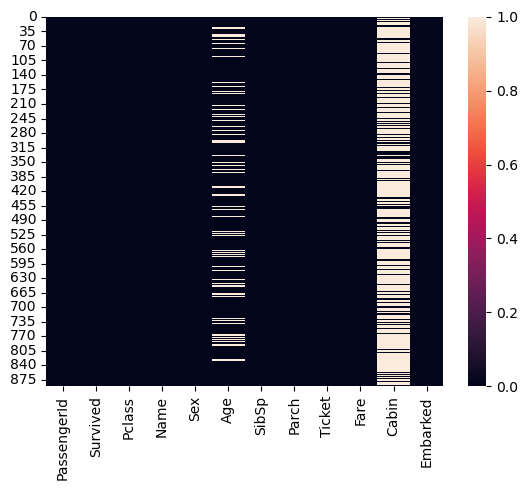

In [127]:
sns.heatmap(titan.isnull())

<Axes: >

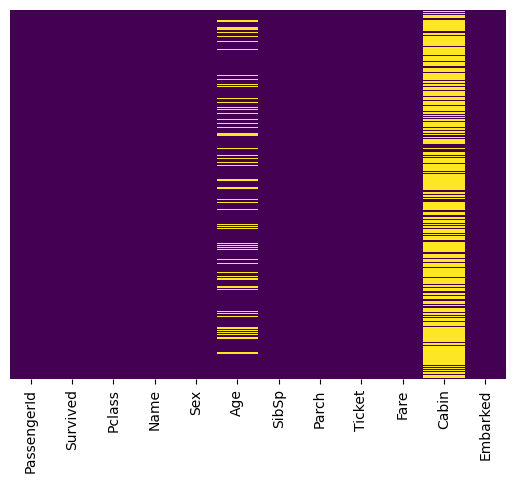

In [128]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

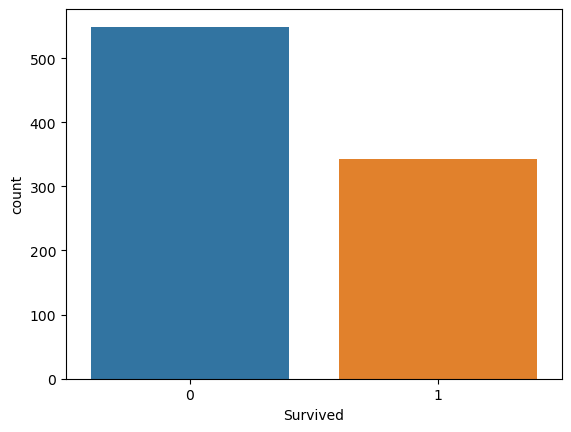

In [129]:
sns.countplot(x='Survived',data=titan)

In [130]:
titan['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

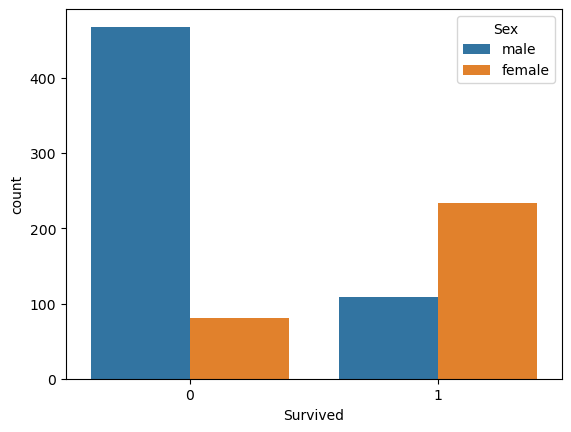

In [131]:
sns.countplot(x='Survived',data=titan,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

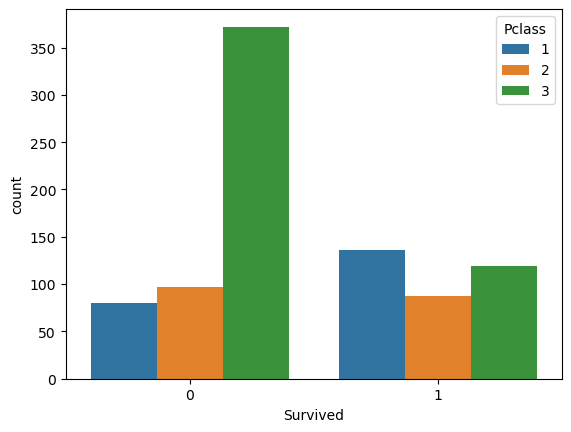

In [132]:
sns.countplot(x='Survived',data=titan,hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

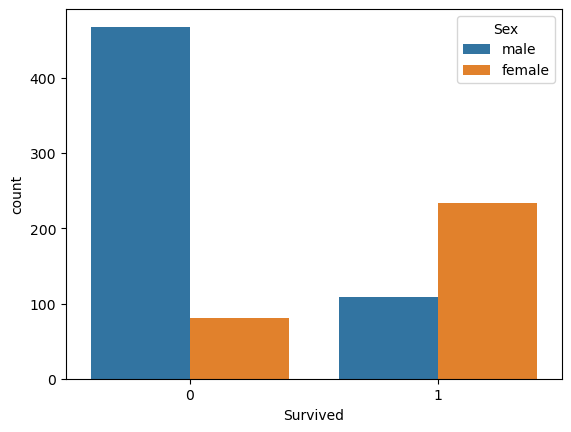

In [133]:
sns.countplot(x='Survived',hue='Sex',data=titan)

C:\Users\HP\AppData\Local\Temp\ipykernel_15200\637434810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan['Age']).bins=30


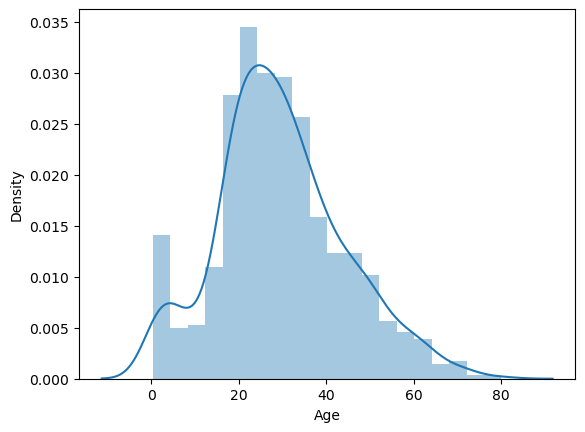

In [134]:
sns.distplot(titan['Age']).bins=30

<Axes: ylabel='Frequency'>

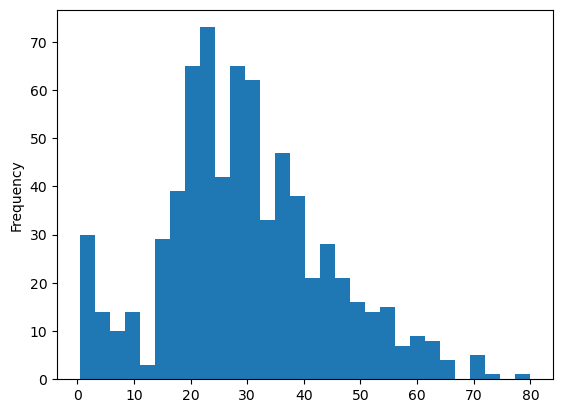

In [135]:
titan['Age'].plot.hist(bins=30)

In [136]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [137]:
#Column value  imputations
titan['Age'] = titan[['Age','Pclass']].apply(impute_age,axis=1)

In [138]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

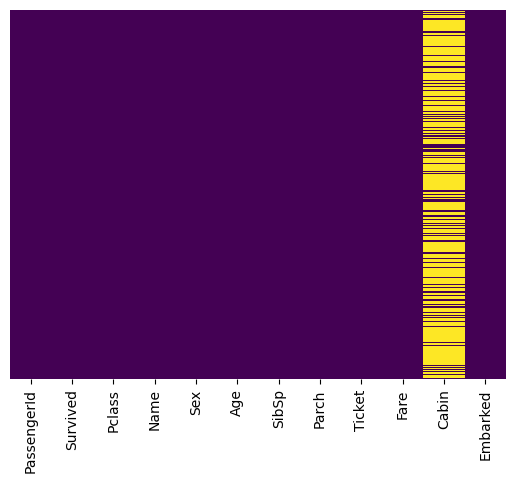

In [139]:
# titan['Age'] = titan['Age'].apply(impute_age,axis=1)
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
titan['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [141]:
titan.drop('Cabin',axis=1, inplace=True)

In [142]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

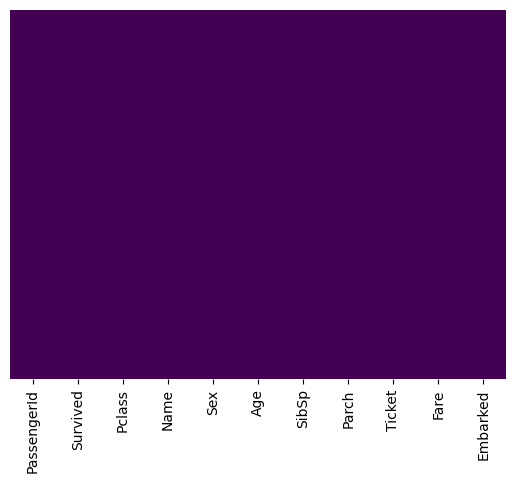

In [143]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [144]:
titan['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [145]:
embarked = pd.get_dummies(titan['Embarked'],drop_first=True)

In [146]:
embarked.head(20)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
5,True,False
6,False,True
7,False,True
8,False,True
9,False,False


In [147]:
Gender = pd.get_dummies(titan['Sex'],drop_first=True)

In [148]:
Gender.head()

,male
0,True
1,False
2,False
3,False
4,True


In [149]:
titan = pd.concat([titan,Gender,embarked],axis=1)

In [150]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [151]:
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [152]:
titan.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'],axis=1,inplace=True)

In [153]:
titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [154]:
X = titan.drop('Survived',axis=1)

In [155]:
y = titan['Survived']

In [156]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
logreg = LogisticRegression()

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
6,1,54.0,0,0,51.8625,True,False,True
718,3,24.0,0,0,15.5000,True,True,False
685,2,25.0,1,2,41.5792,True,False,False
73,3,26.0,1,0,14.4542,True,False,False
882,3,22.0,0,0,10.5167,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,False,True
270,1,37.0,0,0,31.0000,True,False,True
860,3,41.0,2,0,14.1083,True,False,True
435,1,14.0,1,2,120.0000,False,False,True


In [162]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
709,3,24.0,1,1,15.2458,True,False,False
439,2,31.0,0,0,10.5000,True,False,True
840,3,20.0,0,0,7.9250,True,False,True
720,2,6.0,0,1,33.0000,False,False,True
39,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,True,False,True
525,3,40.5,0,0,7.7500,True,True,False
381,3,1.0,0,2,15.7417,False,False,False
140,3,24.0,0,2,15.2458,False,False,False


In [163]:
logreg.fit(X_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
predictions = logreg.predict(X_test)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [101]:
print(confusion_matrix(y_test,predictions))

[[151  24]
 [ 37  83]]


In [108]:
#Pickle Module (How to save the finallize which gives the best accuracy)
X_test.iloc[6:7]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
300,1,1,0,0,7.75,False,True,False,False,True,False


In [104]:
predictions 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [109]:
logreg.predict(X_test.iloc[6:7])

array([1], dtype=int64)

In [110]:
titan.iloc[300:301]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
300,1,1,1,0,0,7.75,False,True,False,False,True,False


In [116]:
X_test.iloc[92:93]
logreg.predict(X_test.iloc[92:93])


array([0], dtype=int64)

In [117]:
titan.iloc[625:626]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
625,0,0,0,0,0,32.3208,True,False,True,True,False,True


In [119]:
X_test.iloc[192:193]
logreg.predict(X_test.iloc[192:193])


array([0], dtype=int64)

In [120]:
titan.iloc[721:722]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
721,0,0,0,1,0,7.0542,True,False,True,True,False,True
